# **• Distribution plots for numeric features and target(s) (histogram, density).**

### ***-  These six columns were chosen because they encompass the three fundamental dimensions of any recommendation system: time (hour and day of order), behavior (number of orders and basket order), and periodicity (days since the last order). These columns are the most correlated with the target variable (reordered).***

-   **Determine peak activity**

     The diagram shows that activity starts to rise from 7 am and reaches its peak between 10 am and 4 pm.

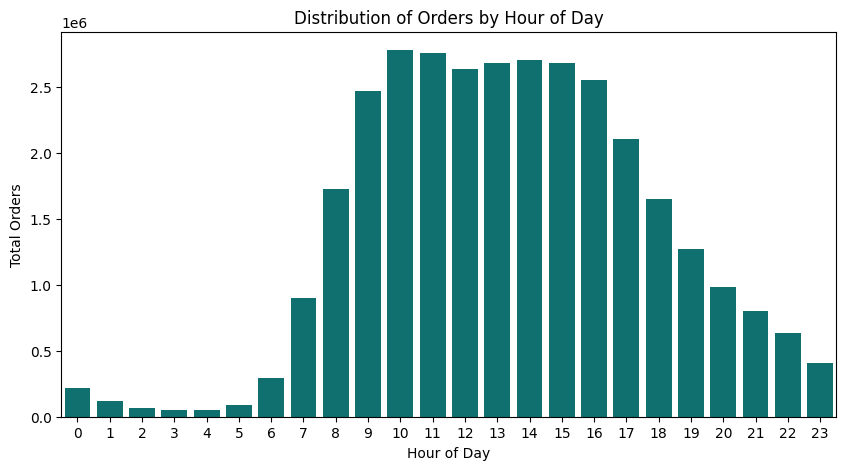

In [ ]:
hourly_dist = My_Data['order_hour_of_day'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_dist.index, y=hourly_dist.values, color='teal')
plt.title('Distribution of Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Orders')
plt.show()

-  **Distribution of days of the week**

    The distribution of orders across the days of the week (from 0 to 6) shows that Saturday and Sunday are the most active days.

/tmp/ipykernel_55/1164475255.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dow_dist.index, y=dow_dist.values, palette='viridis')


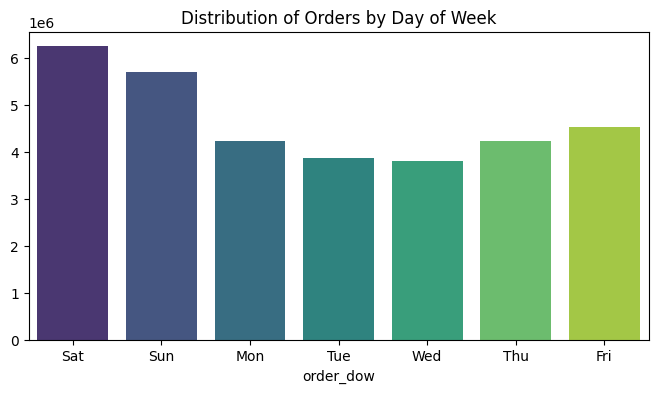

In [ ]:
dow_dist = My_Data['order_dow'].value_counts().sort_index()

plt.figure(figsize=(8, 4))
sns.barplot(x=dow_dist.index, y=dow_dist.values, palette='viridis')
plt.title('Distribution of Orders by Day of Week')
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=['Sat','Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri'])
plt.show()

-  Distribution of days since the last request

    This graph (Density Plot) shows when customers will return to buy again. We notice two clear peaks; one at 7 days and another very sharp one at 30 days.

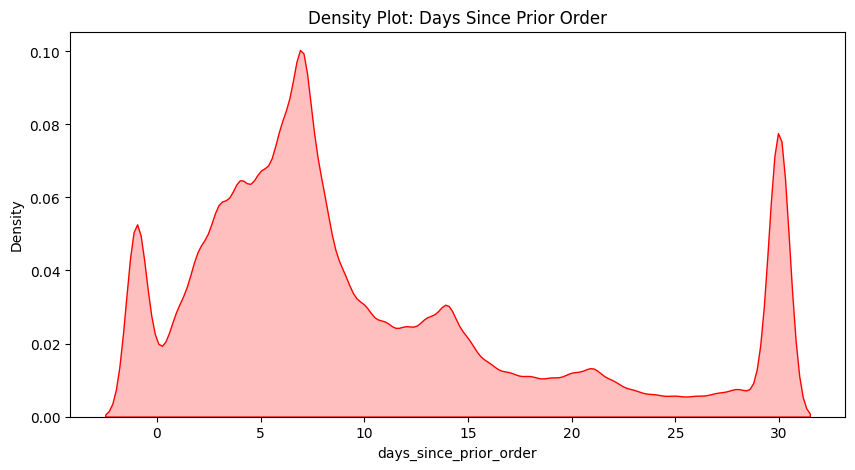

In [ ]:
sample_data = My_Data['days_since_prior_order'].dropna().sample(2000000)

plt.figure(figsize=(10, 5))
sns.kdeplot(sample_data, fill=True, color="r")
plt.title('Density Plot: Days Since Prior Order')
plt.show()

-  **Order of adding products to the cart**

    The probability of a product being the first, second, or tenth item in the shopping cart is shown; the vast majority of products are added to the first five positions (1 to 5), and the higher the position, the fewer the number.

    - Because the dataset exceeds 32 million records, plotting the Key Density Curve (KDE) requires immense processing power. I used a random sample of 2 million records to ensure accurate representation of the statistical distribution while maintaining performance efficiency and processing speed.

    - The value (-1) was used as the Sentinel Value to represent initial requests that contained missing values. Having this value appear separately in the Distribution Plot ensures that new user data is not mixed with that of repeat users, and prevents the model from being biased towards average values ​​such as 7 or 8 days.

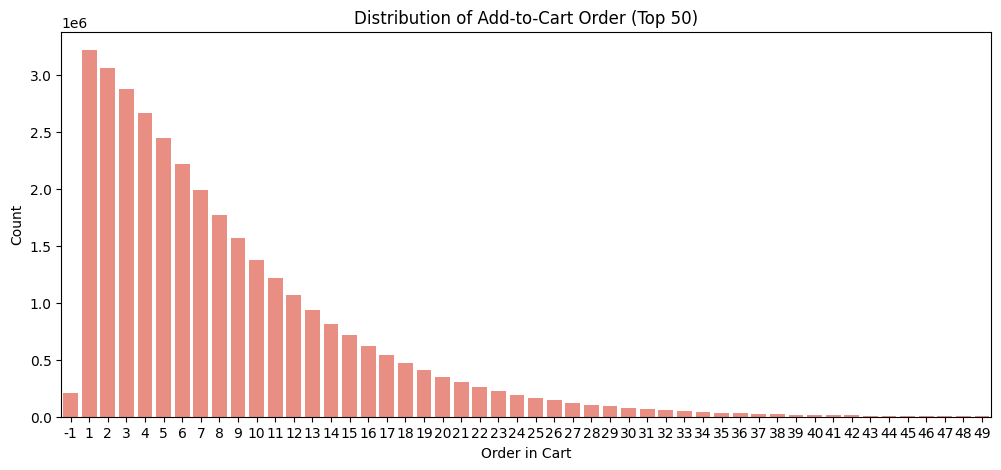

In [ ]:
cart_dist = My_Data['add_to_cart_order'].value_counts().head(50)

plt.figure(figsize=(12, 5))
sns.barplot(x=cart_dist.index, y=cart_dist.values, color='salmon')
plt.title('Distribution of Add-to-Cart Order (Top 50)')
plt.xlabel('Order in Cart')
plt.ylabel('Count')
plt.show()

-  **Customer loyalty**

    The distribution of the number of requests per user is shown. The distribution is right-skewed, as most users have a small number of requests, while the number gradually decreases for "loyal" users who have requested more than 50 times.

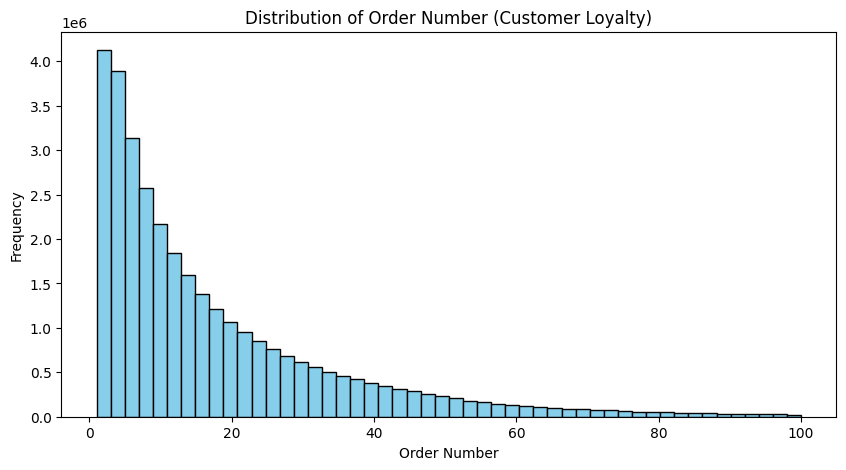

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(My_Data['order_number'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Order Number (Customer Loyalty)')
plt.xlabel('Order Number')
plt.ylabel('Frequency')
plt.show()